In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
# Importing Data File
data = pd.read_csv('Shopping_Revenue.csv')

In [6]:
# Top 5 entries
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [7]:
print(f"Shape of training data: {data.shape}\nShape of test dataset: {data.shape} \
    \nFeatures available: {data.columns}")

Shape of training data: (137, 43)
Shape of test dataset: (137, 43)     
Features available: Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


In [8]:
# Checking null entries
data.isnull().sum().any()

True

In [9]:
# Checking why True is returned in above statement
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [10]:
# Filling the null values with median of the column
data['P6'] = data['P6'].fillna(data['P6'].median())
data['P7'] = data['P7'].fillna(data['P7'].median())

In [11]:
# Rechecking of any Null Entries
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [12]:
# Confirming Null Entries
data.isnull().sum().any()

False

In [13]:
data = pd.concat([data],axis=0)

# Extracting month and year from date column
data['Open Date'] = pd.to_datetime(data['Open Date'])
data['launch_Month'] = [x.month for x in data['Open Date']]
data['launch_year'] = [x.year for x in data['Open Date']]
data.drop(['Id','Open Date'],axis=1,inplace=True)

D:\Yogg Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


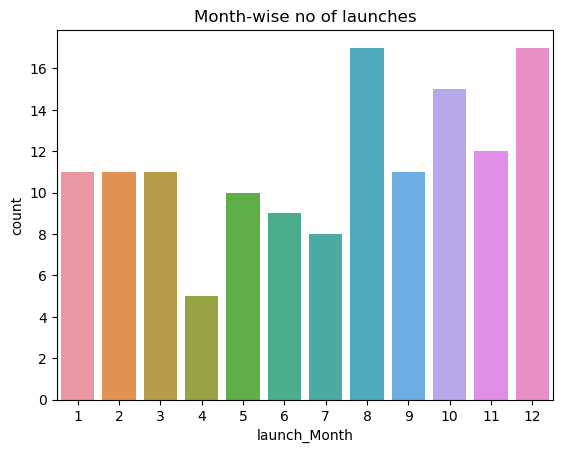

In [14]:
sns.countplot(data['launch_Month'])
plt.title('Month-wise no of launches');

D:\Yogg Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


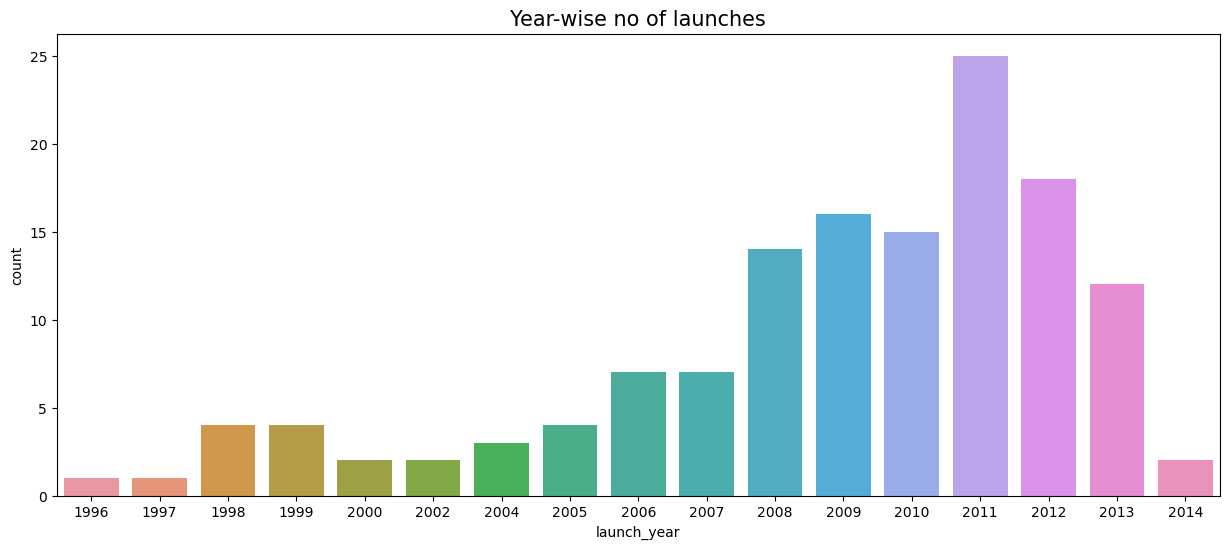

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(data['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

In [16]:
# Re-splitting train and test data
processed_data = data.dropna(axis=0)
processed_test_data = data[128:].drop('revenue',axis=1)

In [17]:
processed_data.shape,processed_test_data.shape

((137, 43), (9, 42))

In [18]:
processed_data.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,revenue,launch_Month,launch_year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,5.0,...,3,4,5,5,4,3,4,5653753,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,5.0,...,0,0,0,0,0,0,0,6923131,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,5.0,...,0,0,0,0,0,0,0,2055379,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,10.0,...,12,10,6,18,12,12,6,2675511,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,5.0,...,1,3,2,3,4,3,3,4316715,5,2009


In [25]:
from sklearn.model_selection import train_test_split
X=processed_data.drop('revenue',axis=1)
y=processed_data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [26]:
from sklearn.metrics import accuracy_score